In [1]:
# library(tidyverse)
# library(repr)
# #library(readxl)
# library(tidymodels)
# #library(ggplot2)
# #install.packages("ggplot2")

library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
options(repr.matrix.max.rows = 6)
install.packages("ggplot2")
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [37]:
hungry <- read.csv("data/processed.hungarian.data", header = FALSE)

colnames(hungry) <- c("age", 'sex', 'chest_pain_type', 'resting_bps', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate', 'excercise_angina', 'depression', 'slope', 'major_vessels', 'thal', 'heart_disease')
hungry[hungry == "?"] <- NA


#hw1 coding team: visualize data (ggpair)?, wrangle, make training and testing data, split training and testing data
# replace '?' to na

# hungry_clean <- hungry |>
#     select(-sex, -excercise_angina, -depression, -slope, -major_vessels, -thal, -rest_ecg, -fasting_blood_sugar) #|>
#    # replace_with_na(replace = list(cholestoral = "?")
#age cp resting_bps cho max_ heart_d

hungry


hungry_no_NA <- hungry |>
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease) |>
    na.omit()
hungry_no_NA

hungry_select <- hungry_no_NA |>
    
    mutate(scaled_age = scale(age, center = TRUE), 
        scaled_rbps = scale(as.integer(resting_bps), center = TRUE),
        scaled_chol = scale(as.integer(cholestoral), center = TRUE),
        scaled_mhr = scale(as.integer(max_heartrate), center = TRUE),
        scaled_hd = scale(heart_disease, center = TRUE))
hungry_select

hungry_split <- initial_split(hungry, prop = 3/4, strata = chest_pain_type)
hungry_training <- training(hungry_split)
hungry_testing <- testing(hungry_split)




age,sex,chest_pain_type,resting_bps,cholestoral,fasting_blood_sugar,rest_ecg,max_heartrate,excercise_angina,depression,slope,major_vessels,thal,heart_disease
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


,age,chest_pain_type,resting_bps,cholestoral,max_heartrate,heart_disease
,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,28,2,130,132,185,0
2,29,2,120,243,160,0
4,30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
292,56,4,155,342,150,1
293,58,2,180,393,110,1
294,65,4,130,275,115,1


,age,chest_pain_type,resting_bps,cholestoral,max_heartrate,heart_disease,scaled_age,scaled_rbps,scaled_chol,scaled_mhr,scaled_hd
,<int>,<int>,<chr>,<chr>,<chr>,<int>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,28,2,130,132,185,0,-2.534319,-0.1417069,-1.7525645,1.9519695,-0.7716344
2,29,2,120,243,160,0,-2.406180,-0.7110651,-0.1128181,0.8875169,-0.7716344
4,30,1,170,237,170,0,-2.278040,2.1357259,-0.2014530,1.3132979,-0.7716344
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
292,56,4,155,342,150,1,1.053593,1.2816886,1.3496585,0.4617359,1.291151
293,58,2,180,393,110,1,1.309873,2.7050841,2.1030555,-1.2413883,1.291151
294,65,4,130,275,115,1,2.206851,-0.1417069,0.3599016,-1.0284977,1.291151


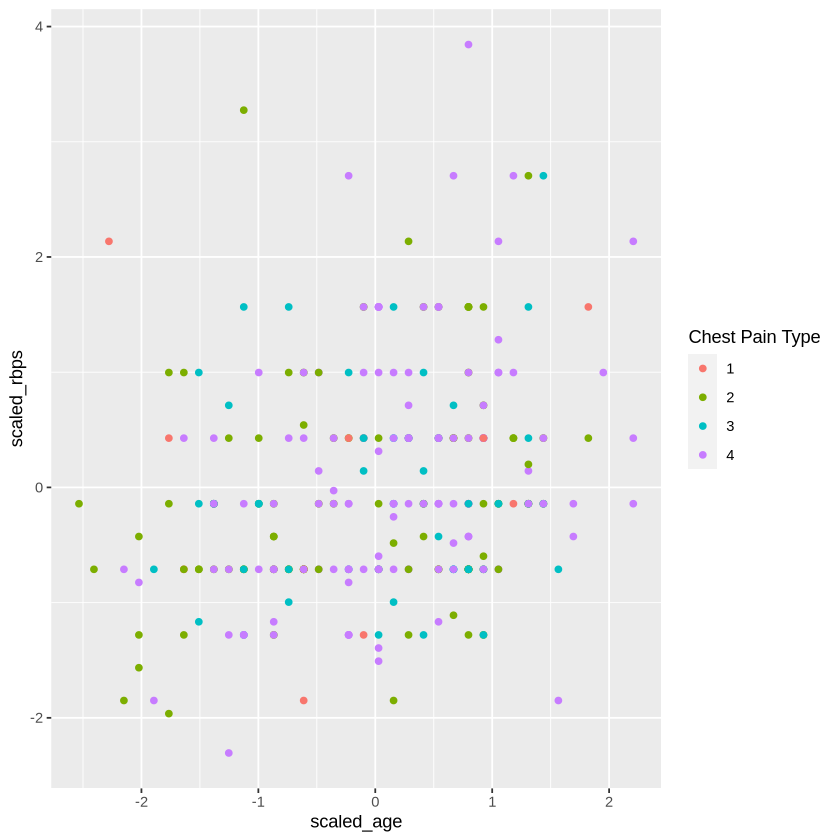

In [47]:
p1 <- ggplot(hungry_select, aes(x = scaled_age, y= scaled_rbps, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p1

# p1 <- hungry |>  
#     ggplot(aes(x=mass, 
#                y= width, 
#                colour = fruit_name)) +
#         labs(x = "Mass (grams)",
#              y = "Width (cm)",
#             colour = 'Name of the Fruit') +
#         geom_point()

# p3 <- ggplot(hungry_select, aes(x = cholesterol)) +
#   geom_histogram(binwidth = 5, fill = "green", color = "black", alpha = 0.8) +
#   labs(title = "Distribution of Cholesterol", x = "Cholesterol", y = "Frequency")
# p3

# p4 <- ggplot(hungry_select, aes(x = age)) +
#   geom_histogram(binwidth = 5, fill = "red", color = "black", alpha = 0.8) +
#   labs(title = "Distribution of Age", x = "Age", y = "Frequency")
# p4

# p5 <- ggplot(hungry_select, aes(x = max_heart_rate)) +
#   geom_histogram(binwidth = 5, fill = "orange", color = "black", alpha = 0.8) +
#   labs(title = "Distribution of Max Heart Rate", x = "Max Heart Rate", y = "Frequency")
# p5

# # Create a bar plot for categorical predictor variable (chest_pain_type)
# p2 <- ggplot(hungry_select, aes(x = chest_pain_type, fill = chest_pain_type)) +
#   geom_bar() +
#   labs(title = "Distribution of Chest Pain Types", x = "Chest Pain Type", y = "Frequency") +
#   theme_minimal()
# p2

# # Create a bar plot for the target variable (heart_disease)
# p6 <- ggplot(hungry_select, aes(x = as.factor(heart_disease), fill = as.factor(heart_disease))) +
#   geom_bar() +
#   labs(title = "Distribution of Heart Disease", x = "Heart Disease", y = "Frequency") +
#   theme_minimal()
# p6
